# **Portfolio Optimization using Python and Efficient Frontier**


In [2]:
pip install yfinance

     |████████████████████████████████| 6.3MB 29.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=e4216f4afc3e965947b51e1c69e599719486c95d7a9123c4a0e48292663ba18b
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
# Setting the starting date
stock_start = '2011-01-01'
# Setting today's date
today = datetime.today().strftime('%Y-%m-%d')

In [7]:
#Generating the stock list
stock_list = []
for i in range(0,4):
  stock_sym = str(input())
  stock_list.append(stock_sym)

INFY.NS
RELIANCE.NS
HDFCBANK.NS
TCS.NS


In [ ]:
#Downloading stock data for the input companies
tickers = stock_list
stock_data = yf.download(tickers, start=stock_start, end=today)
stock_data

In [9]:
#Keeping only the Adj Close column
stock_data = stock_data.drop(['Close','High','Open','Volume','Low'],axis=1)
stock_data

Adj Close                                       
            HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS
Date                                                          
2011-01-03   222.243774   342.154602   478.549133   471.944580
2011-01-04   218.064789   344.439941   488.296112   466.524323
2011-01-05   214.592346   342.278259   487.706757   472.311340
2011-01-06   216.409897   344.113434   492.149414   477.507416
2011-01-07   210.989792   333.487762   482.991943   465.668610
...                 ...          ...          ...          ...
2021-07-12  1487.000000  1547.849976  2084.100098  3186.146729
2021-07-13  1501.849976  1544.949951  2099.699951  3180.608887
2021-07-14  1499.150024  1576.900024  2086.000000  3207.550049
2021-07-15  1520.699951  1580.800049  2082.350098  3202.949951
2021-07-16  1522.349976  1555.449951  2112.399902  3194.800049

[2595 rows x 4 columns]

In [10]:
#Assigning equal weights to the stocks
weights = np.array([0.25, 0.25, 0.25, 0.25])

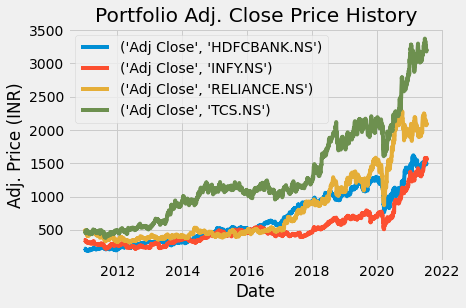

In [11]:
#Visually showing the portfolio 
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = stock_data

#Plotting the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date')
plt.ylabel('Adj. Price (INR)')
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [12]:
#Showing the daily simple returns as percentage change
df = stock_data
returns = df.pct_change()
returns

Adj Close                                
           HDFCBANK.NS   INFY.NS RELIANCE.NS    TCS.NS
Date                                                  
2011-01-03         NaN       NaN         NaN       NaN
2011-01-04   -0.018804  0.006679    0.020368 -0.011485
2011-01-05   -0.015924 -0.006276   -0.001207  0.012405
2011-01-06    0.008470  0.005362    0.009109  0.011001
2011-01-07   -0.025046 -0.030878   -0.018607 -0.024793
...                ...       ...         ...       ...
2021-07-12   -0.009987 -0.009630    0.006228 -0.004691
2021-07-13    0.009987 -0.001874    0.007485 -0.001738
2021-07-14   -0.001798  0.020680   -0.006525  0.008470
2021-07-15    0.014375  0.002473   -0.001750 -0.001434
2021-07-16    0.001085 -0.016036    0.014431 -0.002544

[2595 rows x 4 columns]

In [13]:
#Creating the annualized co-variance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

Adj Close                                
                      HDFCBANK.NS   INFY.NS RELIANCE.NS    TCS.NS
Adj Close HDFCBANK.NS    0.057158  0.016328    0.030330  0.014778
          INFY.NS        0.016328  0.081121    0.018421  0.037765
          RELIANCE.NS    0.030330  0.018421    0.083851  0.019072
          TCS.NS         0.014778  0.037765    0.019072  0.066714

In [14]:
#Calculating the variance and standard deviation of portfolio
#Standard deviation is also the volatality of portfolio

p_var = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
p_vol = np.sqrt(p_var)

print("Variance = ",p_var)
print("Volatality = ",p_vol)

Variance =  0.03513958173159006
Volatality =  0.18745554601448863


In [15]:
#Calculating the annual portfolio returns
p_annualReturns = np.sum(returns.mean() * weights) * 252
p_annualReturns

0.20223368728284374

In [16]:
#Showing the expected annual returns, risk, and variance
percent_var= str(round(p_var,2)*100)+ "%"
percent_vol= str(round(p_vol,2)*100)+ "%"
percent_ret= str(round(p_annualReturns,2)*100)+ "%"

print('Expected Annual Returns: ',percent_ret)
print('Annual Volatality: ',percent_vol)
print('Portfolio Variance: ',percent_var)

Expected Annual Returns:  20.0%
Annual Volatality:  19.0%
Portfolio Variance:  4.0%


In [ ]:
# add explanation

In [17]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 1.3MB 24.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736198 sha256=f3522befe33a10529b05f1082c9aab1f5242554f83768c63e44fbfc2acfb63de
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [19]:
#Portfolio Optimization using Efficient Frontier 

#Calculating the expected returns and sample cov matrix of equities
exp_ret = expected_returns.mean_historical_return(df)
s_cov = risk_models.sample_cov(df)

#Optimize for maximum sharpe ratio 
ef = EfficientFrontier(exp_ret,s_cov)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([(('Adj Close', 'HDFCBANK.NS'), 0.51634), (('Adj Close', 'INFY.NS'), 0.04175), (('Adj Close', 'RELIANCE.NS'), 0.03547), (('Adj Close', 'TCS.NS'), 0.40644)])
Expected annual return: 20.1%
Annual volatility: 19.1%
Sharpe Ratio: 0.95


(0.20123383068271766, 0.1908143807443328, 0.9497912577435563)

In [ ]:
#Checking if the new weights amount to 1
0.66856+0.06194+0.13574+0.13376

1.0

In [20]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


In [21]:
#Getting the starting balance
start_balance = int(input("Enter the starting balance: "))

Enter the starting balance: 2500000


In [22]:
#Generating discrete allocation of shares per equity based on funds

def discrete_alloc(funds):
  latest_prices = get_latest_prices(df)
  weights = cleaned_weights
  d_alloc = DiscreteAllocation(weights,latest_prices, total_portfolio_value=funds)

  allocation, leftover = d_alloc.lp_portfolio()
  print('Discrete Allocation:',allocation)
  print('Remaining funds: INR{:.2f}'.format(leftover))

discrete_alloc(start_balance)

Discrete Allocation: {('Adj Close', 'HDFCBANK.NS'): 848, ('Adj Close', 'INFY.NS'): 67, ('Adj Close', 'RELIANCE.NS'): 42, ('Adj Close', 'TCS.NS'): 318}
Remaining funds: INR164.86
